In [63]:
#pip install plotly

In [62]:
#pip install squarify==0.4.3

In [61]:
#pip install wordcloud

In [1]:
#pip install mlxtend  

In [1]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')


# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
df = pd.read_csv('Market_Basket_Optimisation.csv',header=None)
df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [4]:
#Our data consists of 7501 rows and 20 columns
df.shape

(7501, 20)

In [5]:
#Statistics of categorical value
df.describe(include = 'object')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,protein bar,frozen smoothie,protein bar,mayonnaise,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [6]:
#if columns 0 is not null
df[pd.notnull(df.loc[:,0:0])]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,burgers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
 df.iloc[:,0].value_counts(ascending=False).head(20)

mineral water        577
burgers              576
turkey               458
chocolate            391
frozen vegetables    373
spaghetti            354
shrimp               325
grated cheese        293
eggs                 279
cookies              270
french fries         244
herb & pepper        232
ground beef          218
tomatoes             212
milk                 181
escalope             143
fresh tuna           129
red wine             123
ham                  120
cake                  98
Name: 0, dtype: int64

In [8]:
#Change null values with 0.
df.fillna(0,inplace=True)

In [9]:
df.shape

(7501, 20)

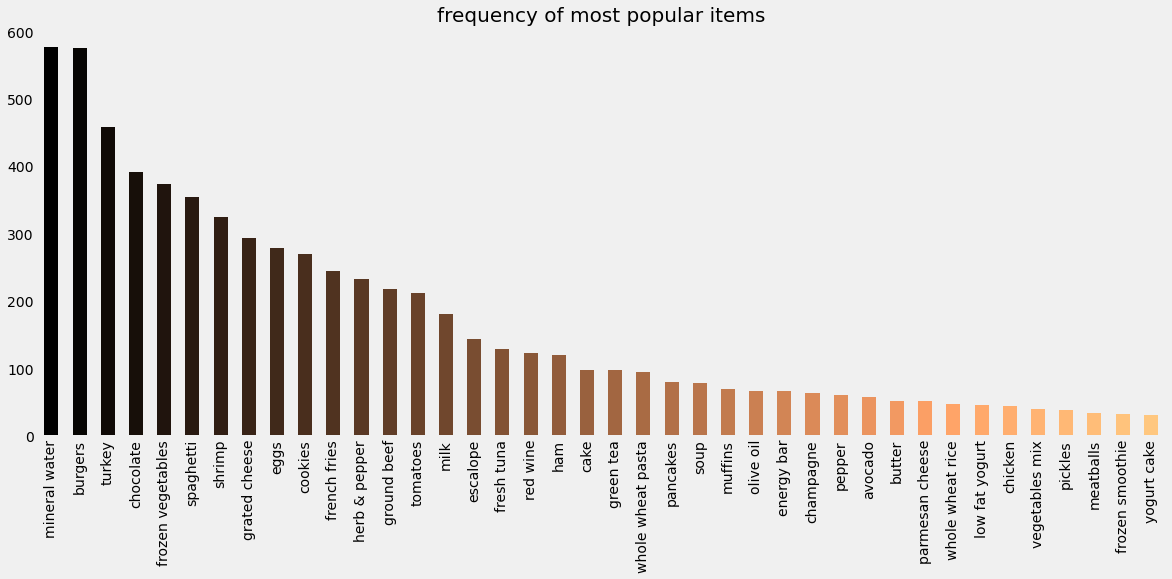

In [10]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
df[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

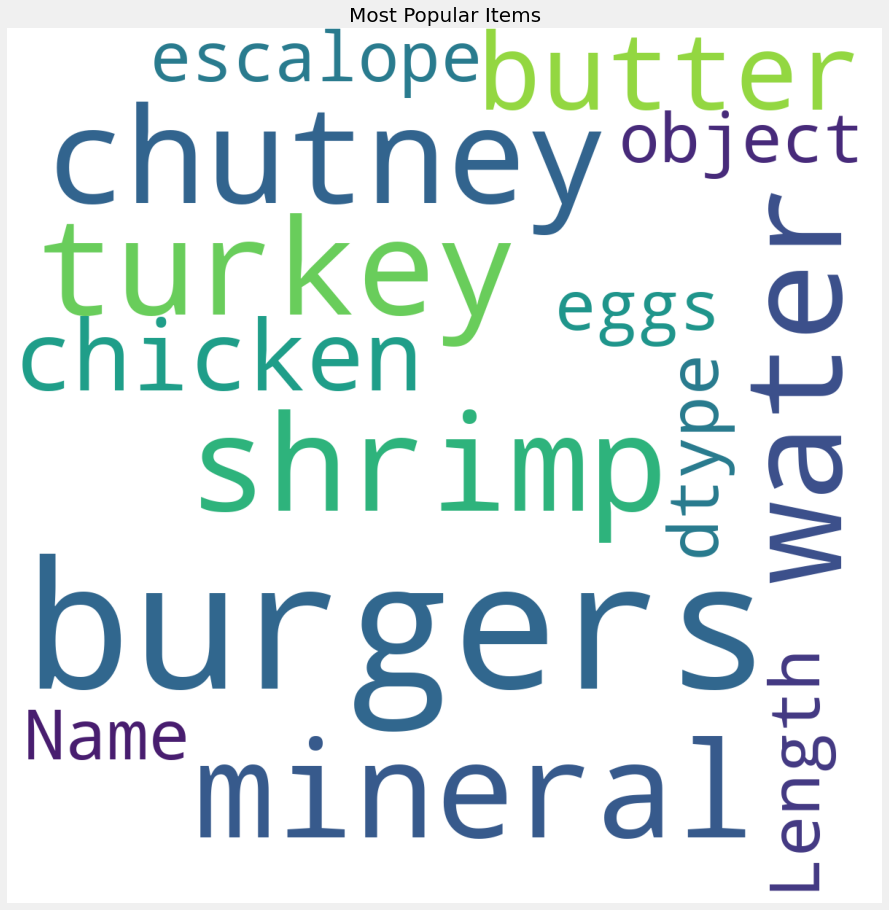

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(df[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

# Training the Apriori Model

In [12]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19],
           dtype='int64')

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
#!pip install apyori

In [14]:
from apyori import apriori

In [15]:
#First we transforn dataframe into a list of transactions
products= list()
for i in range(0,7501):
    products.append([str(df.values[i,j]) for j in range(20)])

In [16]:
products[1] #This is our first transaction in python list

['burgers',
 'meatballs',
 'eggs',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0']

In [17]:
21/7500

0.0028

In [18]:
model= apriori(transactions=products, # This represents list of string of my products to work on
              min_support= 0.003, # This represents minimum support of relations
              min_confidence= 0.2, # This represents minimum confidence of relations
              min_lift=3, # This represents minimum lift of relations
              min_length = 2 , # This represents minimum length of the relation
              max_length = 2 ) # This represents maximum length of the relation

In [19]:
results = list(model)
results

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

In [20]:
pd.DataFrame(results)

,items,support,ordered_statistics
0,"(light cream, chicken)",0.004533,"[((light cream), (chicken), 0.2905982905982905..."
1,"(mushroom cream sauce, escalope)",0.005733,"[((mushroom cream sauce), (escalope), 0.300699..."
2,"(pasta, escalope)",0.005866,"[((pasta), (escalope), 0.3728813559322034, 4.7..."
3,"(honey, fromage blanc)",0.003333,"[((fromage blanc), (honey), 0.2450980392156863..."
4,"(herb & pepper, ground beef)",0.015998,"[((herb & pepper), (ground beef), 0.3234501347..."
5,"(ground beef, tomato sauce)",0.005333,"[((tomato sauce), (ground beef), 0.37735849056..."
6,"(light cream, olive oil)",0.003200,"[((light cream), (olive oil), 0.20512820512820..."
7,"(whole wheat pasta, olive oil)",0.007999,"[((whole wheat pasta), (olive oil), 0.27149321..."
8,"(pasta, shrimp)",0.005066,"[((pasta), (shrimp), 0.3220338983050847, 4.506..."


In [21]:
bought_item = [tuple(result[2][0][0])[0] for result in results]
will_buy_item = [tuple(result[2][0][1])[0] for result in results]
support_values = [result[1] for result in results]
confidences = [result[2][0][2] for result in results]
lift_values = [result[2][0][3] for result in results]

In [22]:
new_data = list(zip(bought_item,will_buy_item,support_values,confidences,lift_values))
new_data

[('light cream',
  'chicken',
  0.004532728969470737,
  0.29059829059829057,
  4.84395061728395),
 ('mushroom cream sauce',
  'escalope',
  0.005732568990801226,
  0.3006993006993007,
  3.790832696715049),
 ('pasta',
  'escalope',
  0.005865884548726837,
  0.3728813559322034,
  4.700811850163794),
 ('fromage blanc',
  'honey',
  0.003332888948140248,
  0.2450980392156863,
  5.164270764485569),
 ('herb & pepper',
  'ground beef',
  0.015997866951073192,
  0.3234501347708895,
  3.2919938411349285),
 ('tomato sauce',
  'ground beef',
  0.005332622317024397,
  0.3773584905660377,
  3.840659481324083),
 ('light cream',
  'olive oil',
  0.003199573390214638,
  0.20512820512820515,
  3.1147098515519573),
 ('whole wheat pasta',
  'olive oil',
  0.007998933475536596,
  0.2714932126696833,
  4.122410097642296),
 ('pasta',
  'shrimp',
  0.005065991201173177,
  0.3220338983050847,
  4.506672147735896)]

In [23]:
new_df=pd.DataFrame(new_data,columns=["Boungt Item", "Expected To Be Bought", "Support", "Confidence","Lift"])
new_df

,Boungt Item,Expected To Be Bought,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,fromage blanc,honey,0.003333,0.245098,5.164271
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
6,light cream,olive oil,0.003200,0.205128,3.114710
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
8,pasta,shrimp,0.005066,0.322034,4.506672


In [24]:
new_df.nlargest(n=10,columns="Lift") # n parameter determines how many rows we want to get, 
                                    # columns parameter determines which will be based to organize data
#we list the our data according to the LiftColumn

,Boungt Item,Expected To Be Bought,Support,Confidence,Lift
3,fromage blanc,honey,0.003333,0.245098,5.164271
0,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
8,pasta,shrimp,0.005066,0.322034,4.506672
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
6,light cream,olive oil,0.003200,0.205128,3.114710


In [25]:
new_df.nlargest(n=10,columns="Confidence") #Now we list the our data according to the Confidence Column
# This means that if a customer buy a tomato sauce, the posibility ot buy ground beef is %37

,Boungt Item,Expected To Be Bought,Support,Confidence,Lift
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
2,pasta,escalope,0.005866,0.372881,4.700812
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
8,pasta,shrimp,0.005066,0.322034,4.506672
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
0,light cream,chicken,0.004533,0.290598,4.843951
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
3,fromage blanc,honey,0.003333,0.245098,5.164271
6,light cream,olive oil,0.003200,0.205128,3.114710


Now we will change some parameters

In [26]:
model2= apriori(transactions=products, # This represents list of string of my products to work on
              min_support= 0.004, # This represents minimum support of relations
              min_confidence= 0.5, # This represents minimum confidence of relations
              min_lift=3, # This represents minimum lift of relations
              min_length = 2 , # This represents minimum length of the relation
              max_length = 3 ) # This represents maximum length of the relation

In [27]:
results2 = list(model2)
results2

[RelationRecord(items=frozenset({'ground beef', 'cooking oil', 'spaghetti'}), support=0.004799360085321957, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ground beef', 'cooking oil'}), items_add=frozenset({'spaghetti'}), confidence=0.5714285714285714, lift=3.2819951870487856)]),
 RelationRecord(items=frozenset({'ground beef', 'shrimp', 'spaghetti'}), support=0.005999200106652446, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ground beef', 'shrimp'}), items_add=frozenset({'spaghetti'}), confidence=0.5232558139534884, lift=3.005315360233627)]),
 RelationRecord(items=frozenset({'tomatoes', 'spaghetti', 'olive oil'}), support=0.004399413411545127, ordered_statistics=[OrderedStatistic(items_base=frozenset({'tomatoes', 'olive oil'}), items_add=frozenset({'spaghetti'}), confidence=0.6111111111111112, lift=3.5099115194827295)])]